# Automobile Dataset Exploratory Data Analysis

### Calculations for the automobile_EDA report in which I explain visualisations, investigations and findings.

# Setup

In [22]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv("automobile.txt")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data cleaning

In [24]:
# Get the list of column names
columns_list = df.columns.tolist()

# Print the list of column names
print(columns_list)

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [25]:
# Removing duplicate rows
df = df.drop_duplicates()

In [26]:
# Drop columns I don't plan to focus on
df = df.drop(columns=['num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'length', 'width', 'height', 'engine-size', 'bore', 'stroke', 'horsepower', 'peak-rpm'])

## Find missing values

In [27]:
df[df == '?'] # Finding the locations of all '?' in the dataset

,symboling,normalized-losses,make,fuel-type,aspiration,wheel-base,curb-weight,engine-type,num-of-cylinders,fuel-system,compression-ratio,city-mpg,highway-mpg,price
0,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df[df == '?'] # Finding the locations of all '?' in the dataset
df = df.replace('?',np.NaN) # replacing the '?' with NaN value.df

In [29]:
df.isna().sum() # Counting the NaN values in the dataset.

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
wheel-base            0
curb-weight           0
engine-type           0
num-of-cylinders      0
fuel-system           0
compression-ratio     0
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [30]:
# Check for the number of rows having at least one missing value
d = df.isnull().any(axis = 1)
index = d.index[d.values]
index

Int64Index([  0,   1,   2,   5,   7,   9,  14,  15,  16,  17,  43,  44,  45,
             46,  48,  49,  63,  66,  71,  73,  74,  75,  82,  83,  84, 109,
            110, 113, 114, 124, 126, 127, 128, 129, 130, 131, 181, 189, 191,
            192, 193],
           dtype='int64')

In [31]:
missing = df.iloc[index,:] # No of rows having at least one missing value.
missing

,symboling,normalized-losses,make,fuel-type,aspiration,wheel-base,curb-weight,engine-type,num-of-cylinders,fuel-system,compression-ratio,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,88.6,2548,dohc,four,mpfi,9.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,88.6,2548,dohc,four,mpfi,9.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,94.5,2823,ohcv,six,mpfi,9.0,19,26,16500
5,2,NaN,audi,gas,std,99.8,2507,ohc,five,mpfi,8.5,19,25,15250
7,1,NaN,audi,gas,std,105.8,2954,ohc,five,mpfi,8.5,19,25,18920
9,0,NaN,audi,gas,turbo,99.5,3053,ohc,five,mpfi,7.0,16,22,NaN
14,1,NaN,bmw,gas,std,103.5,3055,ohc,six,mpfi,9.0,20,25,24565
15,0,NaN,bmw,gas,std,103.5,3230,ohc,six,mpfi,8.0,16,22,30760
16,0,NaN,bmw,gas,std,103.5,3380,ohc,six,mpfi,8.0,16,22,41315
17,0,NaN,bmw,gas,std,110.0,3505,ohc,six,mpfi,8.0,15,20,36880


In [32]:
# Count how many columns are missing all values
df.isnull().all(axis=0).sum()

0

In [33]:
# Count how many rows are missing all values
df.isnull().all(axis=1).sum()

0

In [34]:
# Find the % of the missing values in all the columns
round(df.isnull().sum().sort_values(ascending = False)/len(df) * 100,2)

normalized-losses    20.00
price                 1.95
symboling             0.00
make                  0.00
fuel-type             0.00
aspiration            0.00
wheel-base            0.00
curb-weight           0.00
engine-type           0.00
num-of-cylinders      0.00
fuel-system           0.00
compression-ratio     0.00
city-mpg              0.00
highway-mpg           0.00
dtype: float64

## Filling the missing values

In [35]:
# Change the data type of the target columns
df[['normalized-losses','price']] = df[['normalized-losses','price']].apply(pd.to_numeric)

In [36]:
# Getting descriptive statistics for columns
df[['normalized-losses','price']].describe()

,normalized-losses,price
count,164.000000,201.000000
mean,122.000000,13207.129353
std,35.442168,7947.066342
min,65.000000,5118.000000
25%,94.000000,7775.000000
50%,115.000000,10295.000000
75%,150.000000,16500.000000
max,256.000000,45400.000000


In [37]:
# Replacing the null values in the column with the mean of the column
df.loc[:,'normalized-losses'].fillna(df['normalized-losses'].mean(),inplace = True)
df.loc[:,'price'].fillna(df['price'].mean(),inplace = True)

# Exploration

In [38]:
# Get the list of column names
columns_list = df.columns.tolist()

# Print the list of column names
print(columns_list)

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'wheel-base', 'curb-weight', 'engine-type', 'num-of-cylinders', 'fuel-system', 'compression-ratio', 'city-mpg', 'highway-mpg', 'price']


In [45]:
# Calculate the correlation between the symboling and other variables
correlation_symboling = df.corr()['symboling']

# Sort the correlations in descending order
correlation_symboling = correlation_symboling.sort_values(ascending=False)

# Print the sorted correlations
print(correlation_symboling)

symboling            1.000000
normalized-losses    0.465190
highway-mpg          0.034606
city-mpg            -0.035823
price               -0.082201
compression-ratio   -0.178515
curb-weight         -0.227691
wheel-base          -0.531954
Name: symboling, dtype: float64


C:\Users\CA\AppData\Local\Temp\ipykernel_14740\3414285484.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_symboling = df.corr()['symboling']


C:\Users\CA\AppData\Local\Temp\ipykernel_14740\1354036838.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


Text(0.5, 1.0, 'Correlation for Automobile Data')

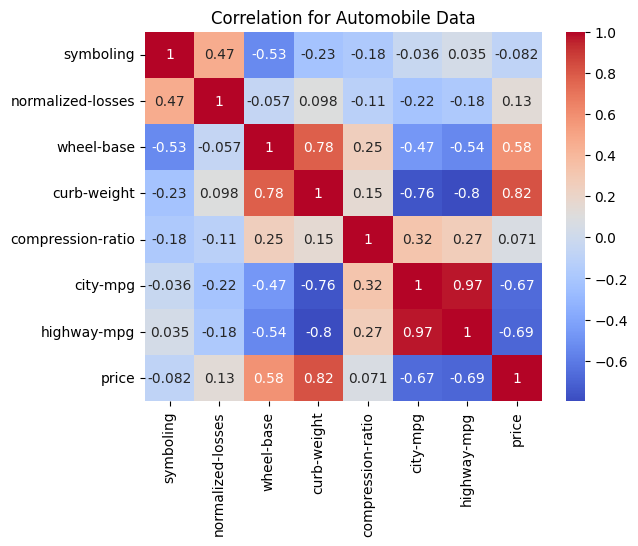

In [55]:
# Create a heatmap to visualize the correlations
ax = sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

# Add a title to the heatmap
ax.set_title('Correlation for Automobile Data')